### Investigating the Stroop Effect

This is an exercise in setting up a hypothesis test, making inferences from a sample, and drawing valid conclusions based on the results. We investigate a classic phenomenon from experimental psychology called the "Stroop Effect".

#### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
(Taken from Nanodegrees Project Details)

#### The dataset

In [56]:
#Read the data into a dataframe using pandas
import pandas as pd
import numpy as np

df = pd.read_csv("stroopdata.csv")

#We add a third column showing the difference between the results
df["Diff"] = df["Incongruent"] - df["Congruent"]
df

,Congruent,Incongruent,Diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


#### 1. What is our independent variable? What is our dependent variable?

Independent variable: The relationship between font color and word name 

Dependent variable: The total response time for each condition

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

$H_{0}$:$\mu_{D}=$ 0

$H_{A}$:$\mu_{D}\neq$0

We are talking about a repeated measures design: Each of the 24 participants is assigned two kinds of treatments. As we also don't know population parameters, a dependent t-test for paired samples should be our statistical test of choice. 

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [41]:
df.describe()

,Congruent,Incongruent,Diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


To analyze this paired data set, we analyze the differences:

$\bar{x}_{diff}$ = 7.96

s$_{diff}$ = 4.86

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


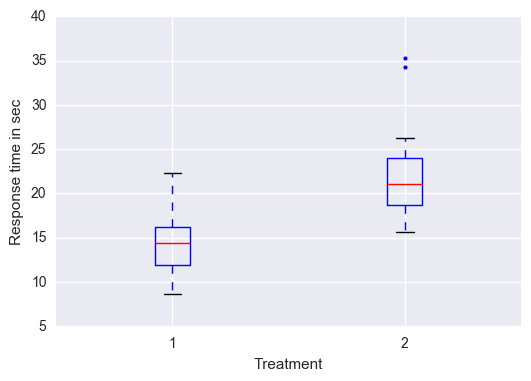

In [25]:
%pylab inline

#Just for fun & practice: Boxplots of the data for the two conditions 
import matplotlib.pyplot as plt

data1= df["Congruent"]
data2 = df["Incongruent"]

plt.figure()
plt.boxplot([data1, data2],0,".")
plt.ylabel("Response time in sec")
plt.xlabel("Treatment")
plt.show()

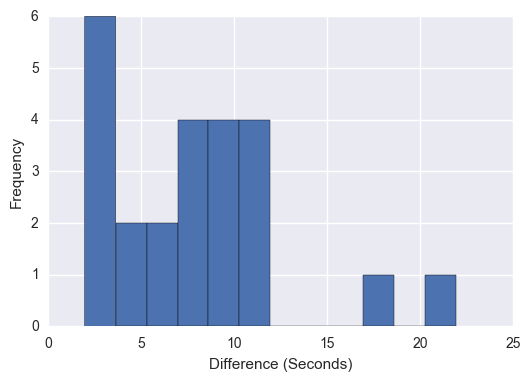

In [66]:
#But our focus lies on the differences, so here is the distribution of the differences
data3 = df["Diff"]

plt.hist(data3, bins=12)
plt.xlabel("Difference (Seconds)")
plt.ylabel("Frequency")
plt.show()

#### Checking conditions

Can the t-distribution be used for this application? I assume the observations are based on
a simple random sample from less than 10% of the population, so independence is reasonable. The distribution is right skewed and has two clear outliers, sample size is 24. It's hard to assess but for our purposes I conclude that we can apply the t-distribution here.

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [67]:
from scipy import stats 

#stats.ttest_rel calculates the t-test on two related samples of scores
stats.ttest_rel(data2, data1)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

For a two-tailed t-test with a confidence level of 95% and df = 23 the t-critical value is +- 2.069.
Our t-statistic is 8.021 - way above the t-critical value; with 0.0000000410 the p-value is really, really small - definitely smaller than our $\alpha$-level of 0.05.

Therefore we reject the null. We have found robust evidence that subjects need significantly more time for the Stroop task when word names do not match the colors in which they are printed.

Yes, this result matches up with my expectations. For every single subject in the data the recorded total time was higher for the "Incongruent" condition than for the "Congruent" Condition. Also the difference between means seemed to be big just by common sense. Last but not least all this was totally in line with my own Stroop Task experience.

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions